In [1]:
%matplotlib inline

from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

In [2]:
cols = ['id', 'type', 'number', 'date','location', 'country', 
        'lat', 'long', 'airport_code', 'airport_name', 'injury_severity', 
        'aircraft_damage', 'aircraft_cat', 'reg_no', 'make', 'model',
        'amateur_built', 'no_engines', 'engine_type', 'FAR_desc', 'schedule', 
        'purpose', 'air_carrier', 'fatal','serious', 'minor', 'uninjured',
        'weather', 'broad_phase', 'report_status', 'pub_date', 'none']  # causion: 'none' col is needed
aaData = pd.read_csv('aviation.csv', delimiter='|', skiprows=1, names=cols)

In [3]:
aaData.head()

,id,type,number,date,location,country,lat,long,airport_code,airport_name,...,air_carrier,fatal,serious,minor,uninjured,weather,broad_phase,report_status,pub_date,none
0,20170501X52315,Accident,GAA17CA251,04/30/2017,"Wheatland, WY",United States,42.055556,-104.928611,,N/A,...,,,,,1,VMC,,Preliminary,05/01/2017,
1,20170425X60823,Accident,CEN17FA167,04/25/2017,"Huntsville, TX",United States,30.794166,-95.538333,,N/A,...,,1,,,,VMC,,Preliminary,05/01/2017,
2,20170427X51522,Accident,GAA17CA246,04/24/2017,"Chesterfield, MO",United States,,,,,...,,,,,1,,,Preliminary,04/27/2017,
3,20170427X20409,Accident,GAA17CA244,04/24/2017,"Waukesha, WI",United States,43.041111,-88.236944,UES,WAUKESHA COUNTY,...,,,,,1,VMC,,Preliminary,04/27/2017,
4,20170424X60355,Accident,CEN17FA164,04/24/2017,"Boonville, MO",United States,38.959167,-92.681389,VER,JESSE VIERTEL MEMORIAL,...,,2,,,,VMC,APPROACH,Preliminary,04/27/2017,


In [4]:
aaData['datetime'] = [datetime.strptime(d, ' %m/%d/%Y ') for d in aaData['date']]
aaData['datetime'].head()

0   2017-04-30
1   2017-04-25
2   2017-04-24
3   2017-04-24
4   2017-04-24
Name: datetime, dtype: datetime64[ns]

In [5]:
aaData['month'] = [int(d.month) for d in aaData['datetime']]
aaData['year'] = [int(d.year) for d in aaData['datetime']]

In [6]:
def decyear(date): 
    start = datetime(year=date.year, month=1, day=1) 
    end = datetime(year=date.year+1, month=1, day=1) 
    decimal = (date - start) / (end - start) 
    return date.year + decimal

In [7]:
aaData['decyear'] = aaData['datetime'].apply(decyear)

In [8]:
cols = ['lat', 'long', 'fatal', 'serious', 'minor', 'uninjured'] 
aaData[cols] = aaData[cols].applymap( 
    lambda x: np.nan if x.isspace() else float(x))

(1948.311475409836, 2017.8260273972603)

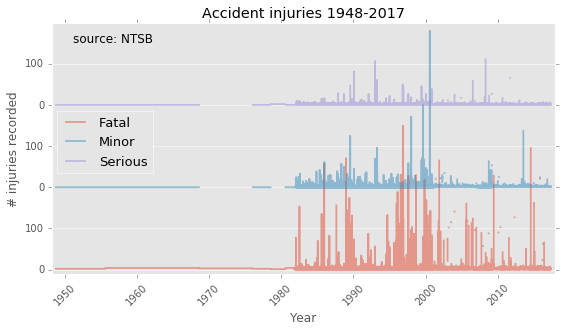

In [9]:
plt.figure(figsize=(9,4.5)) 
plt.step(aaData['decyear'], aaData['fatal'], lw=1.75, where='mid', alpha=0.5, label='Fatal') 
plt.step(aaData['decyear'], aaData['minor']+200, lw=1.75, where='mid', alpha=0.5, label='Minor') 
plt.step(aaData['decyear'], aaData['serious']+200*2, lw=1.75, where='mid', alpha=0.5, label='Serious') 
plt.xticks(rotation=45);
plt.legend(loc=(0.01,.4),fontsize=13) 
plt.ylim((-10,600)) 
plt.grid(axis='x') 
plt.title('Accident injuries {0}-{1}'.format(aaData['year'].min(), aaData['year'].max())) 
plt.text(0.2,0.92,'source: NTSB', size=12, transform=plt.gca().transAxes, ha='right')
plt.yticks(np.arange(0,600,100), [0,100,0,100,0,100]) 
plt.xlabel('Year') 
plt.ylabel('# injuries recorded') 
plt.xlim((aaData['decyear'].min()-0.5, aaData['decyear'].max()+0.5))

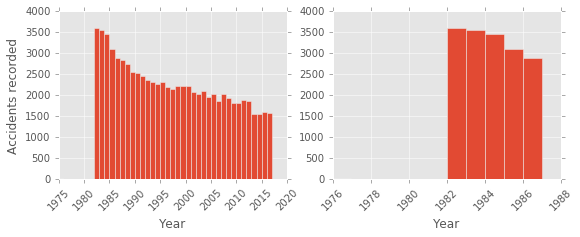

In [10]:
plt.figure(figsize=(9,3))
plt.subplot(121)
year_selection = (aaData['year']>=1975) & (aaData['year']<=2016)
plt.hist(aaData[year_selection]['year'], bins=np.arange(1975,2016+2,1), align='mid')
plt.xlabel('Year')
plt.xticks(rotation=45);
plt.ylabel('Accidents recorded')

plt.subplot(122)
year_selection = (aaData['year']>=1976) & (aaData['year']<=1986)
plt.hist(aaData[year_selection]['year'], bins=np.arange(1976,1986+2,1), align='mid')
plt.xlabel('Year')
plt.xticks(rotation=45);

(0, 36)


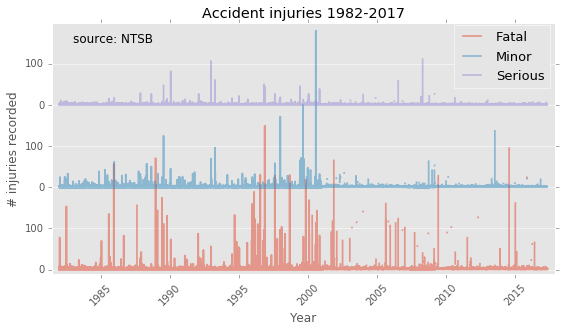

In [12]:
print aaData[aaData['year']<=1981].shape
aaData = aaData[aaData['year']>1981]

plt.figure(figsize=(9, 4.5)) 
plt.step(aaData['decyear'], aaData['fatal'], lw=1.75, where='mid', alpha=0.5, label='Fatal') 
plt.step(aaData['decyear'], aaData['minor']+200, lw=1.75, where='mid', alpha=0.5, label='Minor') 
plt.step(aaData['decyear'], aaData['serious']+200*2, lw=1.75, where='mid', alpha=0.5, label='Serious') 
plt.xticks(rotation=45);
plt.legend(loc=(.8, .74), fontsize=13) 
plt.ylim((-10, 600)) 
plt.grid(axis='x') 
plt.title('Accident injuries {0}-{1}'.format(aaData['year'].min(), aaData['year'].max())) 
plt.text(0.2, 0.92, 'source: NTSB', size=12, transform=plt.gca().transAxes, ha='right')
plt.yticks(np.arange(0, 600, 100), [0, 100, 0, 100, 0, 100]);
plt.xlabel('Year') 
plt.ylabel('# injuries recorded') 
plt.xlim((aaData['decyear'].min()-0.5, aaData['decyear'].max()+0.5));

In [13]:
bins = np.arange(aaData.year.min(), aaData.year.max()+1, 1)
yearly_dig = aaData.groupby(np.digitize(aaData.year, bins))

In [15]:
yearly_dig.max().head()

,id,type,number,date,location,country,lat,long,airport_code,airport_name,...,uninjured,weather,broad_phase,report_status,pub_date,none,datetime,month,year,decyear
1,20080417X00504,Incident,SEA83LA035,12/31/1982,"ZILWAUKER, MI",United States,30.757778,-88.355555,ZZV,ZANESVILLE,...,393.0,VMC,UNKNOWN,Probable Cause,12/31/1983,,1982-12-31,12,1982,1982.997260
2,20051208X01953,Incident,SEA84MA016,12/31/1983,"ZILLAH, WA",United States,48.120000,-113.887500,ZZV,ZUEHL,...,588.0,VMC,UNKNOWN,Probable Cause,12/09/2011,,1983-12-31,12,1983,1983.997260
3,20001214X41903,Incident,SEA85LA116,12/31/1984,"ZOLFO SPRINGS, FL",United States,NaN,NaN,Z41,oxnard,...,495.0,VMC,UNKNOWN,Probable Cause,12/15/2009,,1984-12-31,12,1984,1984.997268
4,20001214X38497,Incident,SEA86MA018,12/31/1985,"ZIONSVILLE, IN",United States,NaN,NaN,pbi,ZELIENOPLE MUNI,...,507.0,VMC,UNKNOWN,Probable Cause,11/10/1992,,1985-12-31,12,1985,1985.997260
5,20010110X00284,Incident,SEA87MA035,12/31/1986,"ZILLAH, WA",West Indies,NaN,NaN,ZN6,YUMA AUX. FLD. 4,...,436.0,VMC,UNKNOWN,Probable Cause,10/28/1988,,1986-12-31,12,1986,1986.997260


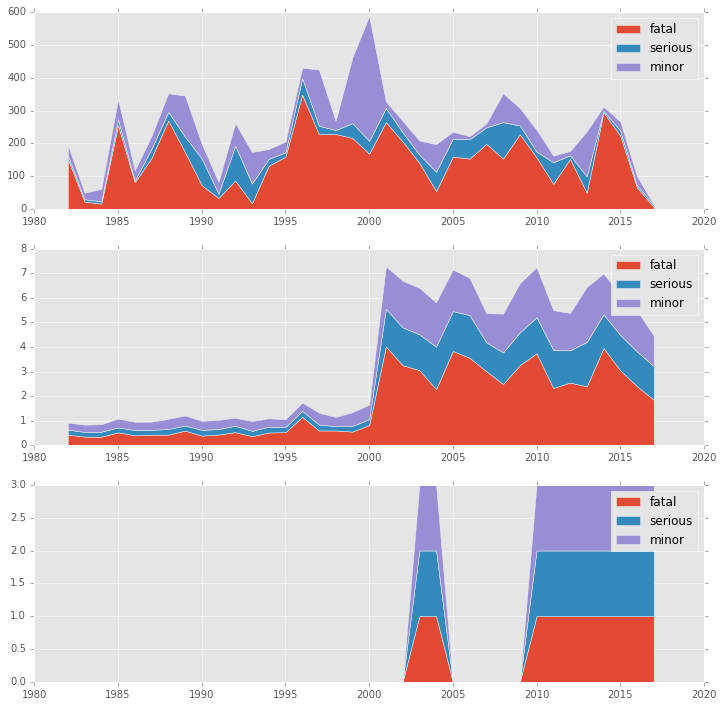

In [25]:
plt.figure(figsize=(12, 12))
plt.subplot(311)
data = yearly_dig.max()
p = plt.stackplot(data.year, np.row_stack((data['fatal'], data['serious'], data['minor'])))
plt.legend(p, ['fatal', 'serious', 'minor'])
plt.subplot(312)
data = yearly_dig.mean()
p = plt.stackplot(data.year, np.row_stack((data['fatal'], data['serious'], data['minor'])))
plt.legend(p, ['fatal', 'serious', 'minor'])
plt.subplot(313)
data = yearly_dig.min()
p = plt.stackplot(data.year, np.row_stack((data['fatal'], data['serious'], data['minor'])))
plt.legend(p, ['fatal', 'serious', 'minor'])